In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

In [16]:
data = []
with open("../../data/analysis/patterns_first_data_point.json") as patterns_json:
    patterns = json.load(patterns_json)
    for pattern in patterns:
        data_obj = {"name": pattern["name"], "count": 0, "time": "First data point available"}
        for project in pattern["projects"]:
            if project["days"] != -1:
                data_obj["count"] += 1
        
        data.append(data_obj)
    data.sort(key=lambda k : k['name'])
    
with open("../../data/analysis/patterns_last_data_point.json") as patterns_json:
    
    patterns = json.load(patterns_json)
    for pattern in patterns:
        data_obj = {"name": pattern["name"], "count": 0, "time": "Data point at 30th of April 2021"}
        for project in pattern["projects"]:
            if project["days"] != -1:
                data_obj["count"] += 1
        
        data.append(data_obj)
    data.sort(key=lambda k : k['name'])

df = pd.DataFrame(data={'count': [record["count"] for record in data], 'projects': [record["name"] for record in data], 'time': [record["time"] for record in data]})

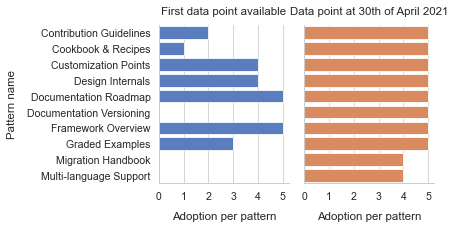

In [25]:
sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif', font_scale=1.2)

g = sns.FacetGrid(df, col="time", hue="time",
                     col_wrap=2)

g.map_dataframe(sns.barplot, x="count", y="projects")
g.set_axis_labels("Adoption per pattern", "Pattern name")
g.set_titles(col_template="{col_name}", pad=10)

for ax in g.axes:
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 10
    ax.set(xticks=[0, 1, 2, 3, 4, 5])
    

g.savefig(f'../../figures/pattern_adoption/overall_pattern_adoption.pdf', format='pdf', bbox_inches="tight")